In [1]:
"""import bibliotek"""
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mea

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#wczytanie danych, ustawienie osi x jako date
df = pd.read_csv('./input/daily-temp.csv',parse_dates = ['Date'], index_col = 'Date')

In [3]:
df.head()

,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


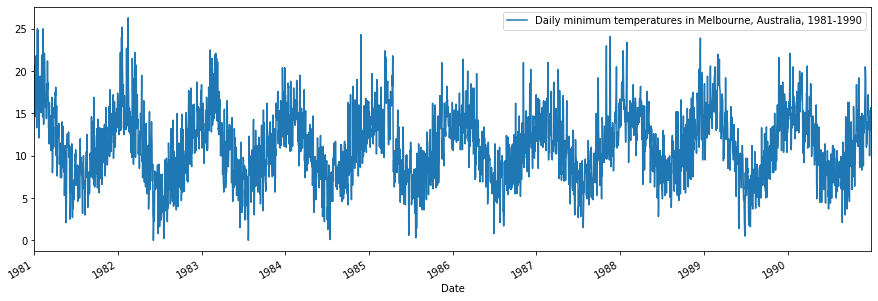

In [4]:
df.plot(figsize = (15,5));

In [5]:
#wczytanie danych, ustawienie osi x jako time
df = pd.read_csv('./input/lynx.csv',parse_dates = ['time'], index_col = 'time')

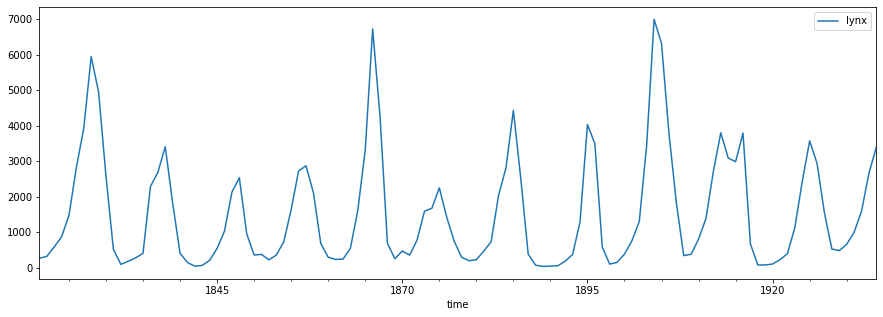

In [6]:
df.plot(figsize = (15,5));

In [7]:
#wczytanie danych
df = pd.read_csv('./input/mauna_loa.csv')

In [8]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [9]:
#przekonwertowanie daty na jedna kolumnę z data
df['date'] = df.apply (lambda row: '{}-{}-{}'.format(int(row ['year']),int(row['month']),int(row['day'])), axis =1)

In [10]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-5-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-5-26
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-6-2
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-6-9
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-6-16


In [11]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

In [12]:
#skrocona wersja konwersji daty na jedna kolumnę
df.index = pd.to_datetime(df[['year','month','day']])

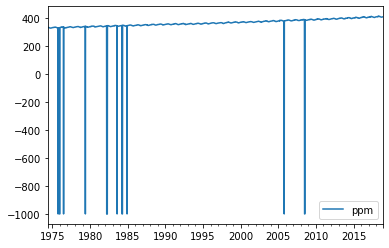

In [13]:
df[['ppm']].plot();

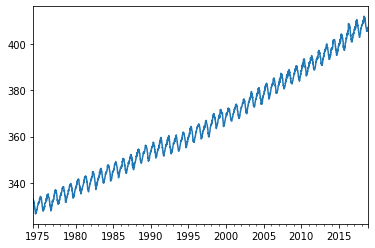

In [14]:
#przemapowanie pustych danych na wartosci 0
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x ).fillna(method='backfill')
df['ppm_fixed'].plot()

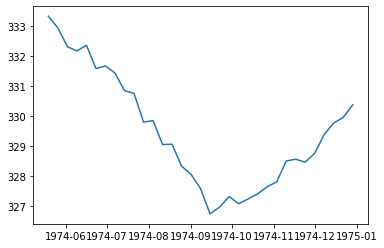

In [15]:
df_1974 = df[df.year == 1974]
plt.plot(df_1974.index, df_1974['ppm_fixed']);

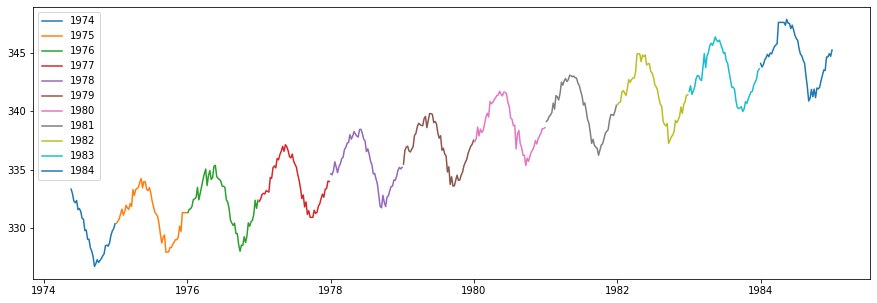

In [16]:
plt.figure(figsize = (15,5));
for year in range (1974,1985):
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year['ppm_fixed'],label = year);

plt.legend();

In [17]:
"""funkcja pomocnicza"""
def linear_func(dataset, k = None, b=0, offset_index=0):
    mean_value = np.mean(dataset)
    if k is None:
        return [mean_value] * len (dataset)
    return [(idx + offset_index)* k+b for idx, _ in enumerate(dataset.index)] 

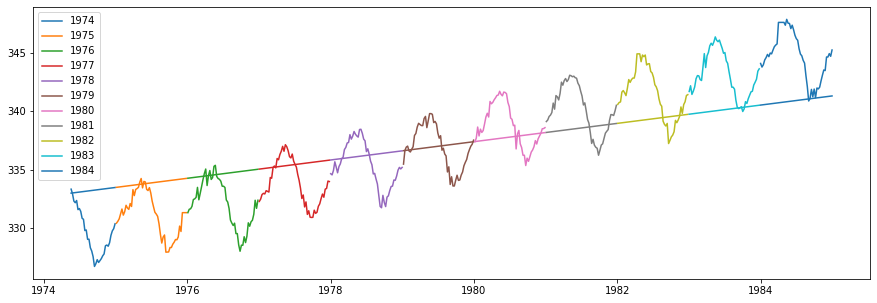

In [18]:
plt.figure(figsize = (15,5));

offset = 0
for year in range (1974,1985):
    df_year = df[df.year == year]
    plot = plt.plot(df_year.index, df_year['ppm_fixed'],label = year);
    plt.plot(df_year.index, linear_func(df_year,k = 0.015, b= 333,offset_index = offset),color=plot[0].get_color())
    offset +=df_year.shape[0]

plt.legend();